In [1]:

from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import pandas as pd
import numpy as np
from itertools import permutations
from feature_selec import *
from sklearn.preprocessing import StandardScaler
import pymrmr


In [2]:
# set number of variables to be considered
n_vars = 18

datos = pd.read_csv('../data/survey-pilot-3-EN-maped.csv') # data discretised acording to feature_selec.py -> preprocess_datos

X_ori = np.array(datos.iloc[:,0:-1])
Y_ori = np.array(datos.iloc[:,-1]) # output is the last variable (post-covid changes)

scaleX=StandardScaler()
scaleY=StandardScaler()

scaleX.fit(X_ori)
X = scaleX.transform(X_ori)

#scaleY.fit(Y_ori.reshape(-1,1))
#Y = scaleY.transform(Y_ori.reshape(-1,1))
Y_ori = Y_ori + 1
Y = Y_ori.reshape(-1,1)

#allperms = gen_all_combinations(n_vars)  -> not feasible due to n_vars

#Let's compute the MI for each single variable
list_single_mi = [] # to store values of MI for each single variable
for i in range(n_vars):
    print("Variable %d" % i)
    list_single_mi = np.append(list_single_mi,mutual_info_score(X[:,i],np.reshape(Y,-1))) 
  #  list_single_MI = np.append(list_single_mi,mutual_information(X[:,i],Y)) 

idx = np.array(range(n_vars))

print(" MI classification")
list_classif_MI = mutual_info_classif(X,Y)
list_classif_MI = np.hstack((idx.reshape(-1,1), list_classif_MI.reshape(-1,1)))
print(list_classif_MI)


print("MI computed score...")

list_single_mi = np.hstack((idx.reshape(-1,1), list_single_mi.reshape(-1,1)))

print(list_single_mi)

#print(np.lexsort((list_single_mi[:,1],list_single_mi[:,0])))

I = np.argsort(list_single_mi[:, 1]); b = list_single_mi[I,:]

print("Ordered according to MI")
print(b)

'''
print("MI Gael's algorithm...")
idx = np.array(range(n_vars))

list_single_MI = np.hstack((idx.reshape(-1,1), list_single_MI.reshape(-1,1)))

print(list_single_MI)

#print(np.lexsort((list_single_mi[:,1],list_single_mi[:,0])))

I = np.argsort(list_single_MI[:, 1]); b = list_single_MI[I,:]

print("Ordered according to Gael's MI")
print(b)

'''

print('-------------- Using mRMR   ---------------')
print(pymrmr.mRMR(datos, 'MIQ', 10))



#Features selected MI higher than 10e-2
'''
 [3.00000000e+00 1.22980916e-02]
 [9.00000000e+00 1.56839675e-02]
 [1.60000000e+01 1.61424039e-02]
 [1.40000000e+01 1.61779327e-02]
 [2.00000000e+00 1.61875746e-02]
 [6.00000000e+00 2.15048791e-02]
 [1.70000000e+01 3.80414048e-02]
 [1.50000000e+01 4.67424303e-02]
 [7.00000000e+00 5.11351150e-02]
'''



Variable 0
Variable 1
Variable 2
Variable 3
Variable 4
Variable 5
Variable 6
Variable 7
Variable 8
Variable 9
Variable 10
Variable 11
Variable 12
Variable 13
Variable 14
Variable 15
Variable 16
Variable 17
 MI classification
[[0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [2.00000000e+00 0.00000000e+00]
 [3.00000000e+00 9.73383878e-03]
 [4.00000000e+00 5.68191914e-02]
 [5.00000000e+00 0.00000000e+00]
 [6.00000000e+00 1.14278082e-02]
 [7.00000000e+00 1.87803493e-02]
 [8.00000000e+00 0.00000000e+00]
 [9.00000000e+00 0.00000000e+00]
 [1.00000000e+01 1.31534894e-02]
 [1.10000000e+01 1.64517867e-02]
 [1.20000000e+01 1.72858891e-02]
 [1.30000000e+01 5.51883747e-02]
 [1.40000000e+01 3.24459218e-02]
 [1.50000000e+01 8.76971237e-02]
 [1.60000000e+01 1.37251485e-02]
 [1.70000000e+01 4.80081801e-02]]
MI computed score...
[[0.00000000e+00 1.88209028e-04]
 [1.00000000e+00 7.01909504e-03]
 [2.00000000e+00 1.61875746e-02]
 [3.00000000e+00 1.22980916e-02]
 [4.00000000e+00 2.03806166

'\n [3.00000000e+00 1.22980916e-02]\n [9.00000000e+00 1.56839675e-02]\n [1.60000000e+01 1.61424039e-02]\n [1.40000000e+01 1.61779327e-02]\n [2.00000000e+00 1.61875746e-02]\n [6.00000000e+00 2.15048791e-02]\n [1.70000000e+01 3.80414048e-02]\n [1.50000000e+01 4.67424303e-02]\n [7.00000000e+00 5.11351150e-02]\n'

*** MaxRel features ***
Order    Fea     Name    Score
1        13      OtherBot        0.072
2        5       GradesBot       0.069
3        2       Age     0.031
4        4       FAQBot          0.027
5        15      Messaging Organization → Number of approaches considered        0.020
6        11      MessagingPlatformTelegram       0.013
7        17      Discipline      0.007
8        9       MessagingPlatformProvided       0.007
9        6       Gender          0.003
10       8       MessagingPlatformOther          0.003

*** mRMR features *** 
Order    Fea     Name    Score
1        13      OtherBot        0.072
2        11      MessagingPlatformTelegram       47.895
3        9       MessagingPlatformProvided       17.949
4        2       Age     3.179
5        5       GradesBot       3.536
6        4       FAQBot          1.142
7        15      Messaging Organization → Number of approaches considered        1.142
8        17      Discipline      0.334
9        8       MessagingPlatformOther          0.168
10       6       Gender          0.174

In [3]:

# Carry out brute force approach with 9 variables

X_crop = X[:, [7, 15, 17, 6, 2, 14, 16, 9, 3]]


#Then drop the ones with smaller MI and check brute force on the others

allperms = gen_all_combinations(9) 

print("Computing MI for all %d combinations" % len(allperms))

list_mi=[]
i=0
while i<len(allperms):
    # apply feature mask using booleans (indexes not correct), changed data type to float for data
    list_mi = np.append(list_mi,abs(mutual_information((np.array(X_crop[:,allperms[i]==1], dtype='float32'),np.array(Y, dtype='float32')))))

    if(np.mod(i+1,50)==0):
        print("Iteration %d" % i)
        pos_max = np.argmax(list_mi)
        print("Best MI value %f for variables %s" % (list_mi[pos_max], allperms[pos_max]))


    i+=1

pos_max = np.argmax(list_mi)
print("FINAL: Best MI value %f for variables %s" % (list_mi[pos_max], allperms[pos_max]))


# Best MI value 28.491724 for variables [0. 0. 1. 1. 1. 1. 1. 1. 1.]

#                                       [x, x, 17, 6, 2, 14, 16, 9, 3]




Generating permutations... 2 
Generating permutations... 3 
Generating permutations... 4 
Generating permutations... 5 
Generating permutations... 6 
Generating permutations... 7 
Generating permutations... 8 
Computing MI for all 511 combinations
Iteration 49
Best MI value 13.202651 for variables [0. 0. 0. 0. 1. 1. 1. 1. 1.]
Iteration 99
Best MI value 21.775021 for variables [0. 0. 0. 1. 1. 1. 1. 1. 1.]
Iteration 149
Best MI value 28.544251 for variables [0. 0. 1. 1. 1. 1. 1. 1. 1.]
Iteration 199
Best MI value 28.544251 for variables [0. 0. 1. 1. 1. 1. 1. 1. 1.]
Iteration 249
Best MI value 28.544251 for variables [0. 0. 1. 1. 1. 1. 1. 1. 1.]
Iteration 299
Best MI value 28.544251 for variables [0. 0. 1. 1. 1. 1. 1. 1. 1.]
Iteration 349
Best MI value 28.544251 for variables [0. 0. 1. 1. 1. 1. 1. 1. 1.]
Iteration 399
Best MI value 28.544251 for variables [0. 0. 1. 1. 1. 1. 1. 1. 1.]
Iteration 449
Best MI value 28.544251 for variables [0. 0. 1. 1. 1. 1. 1. 1. 1.]
Iteration 499
Best MI val

Let's build a model that tries to provide the same output using all the features, then the ones selected using MI...

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# very few data -> we don't use train/test, just look at accuracy in training TODO LOO-CV

clf_all_vars = MLPClassifier(random_state=1, max_iter=500, hidden_layer_sizes=10).fit(X, Y)

X_crop = X[:, [17, 6, 2, 14, 16, 9, 3]]

clf_select_vars = MLPClassifier(random_state=1, max_iter=500, hidden_layer_sizes=10).fit(X_crop, Y)

'''
*** MaxRel features ***
Order    Fea     Name    Score
1        13      OtherBot        0.072
2        5       GradesBot       0.069
3        2       Age     0.031
4        4       FAQBot          0.027
5        15      Messaging Organization → Number of approaches considered        0.020
6        11      MessagingPlatformTelegram       0.013
'''

X_crop_MR = X[:, [13, 5, 2, 4, 15, 11]]

clf_max_rel = MLPClassifier(random_state=1, max_iter=500, hidden_layer_sizes=10).fit(X_crop_MR, Y)

'''
*** mRMR features *** 
Order    Fea     Name    Score
1        13      OtherBot        0.072
2        11      MessagingPlatformTelegram       47.895
3        9       MessagingPlatformProvided       17.949
4        2       Age     3.179
5        5       GradesBot       3.536
6        4       FAQBot          1.142
7        15      Messaging Organization → Number of approaches considered        1.142
'''

X_crop_mRMR = X[:, [13, 11, 9, 2, 5, 4, 15]]

clf_mrmr = MLPClassifier(random_state=1, max_iter=500, hidden_layer_sizes=10).fit(X_crop_mRMR, Y)


print("Prediction accuracy using all featuers: %f " % accuracy_score(Y,clf_all_vars.predict(X)) )
print("Prediction accuracy using selected features: %f " % accuracy_score(Y,clf_select_vars.predict(X_crop)) )
print("Prediction accuracy using max relevance: %f " % accuracy_score(Y,clf_max_rel.predict(X_crop_MR)) )
print("Prediction accuracy using mrmr: %f " % accuracy_score(Y,clf_mrmr.predict(X_crop_mRMR)) )


print(" Clasif. report using all vars ")
print(classification_report(Y,clf_all_vars.predict(X)))

print(" Clasif. report using feature selection ")
print(classification_report(Y,clf_select_vars.predict(X_crop)))

print(" Clasif. report using max relevance ")
print(classification_report(Y,clf_max_rel.predict(X_crop_MR)))

print(" Clasif. report using max relevance ")
print(classification_report(Y,clf_mrmr.predict(X_crop_mRMR)))

Prediction accuracy using all featuers: 0.769504 
Prediction accuracy using selected features: 0.677305 
Prediction accuracy using max relevance: 0.613475 
Prediction accuracy using mrmr: 0.599291 
 Clasif. report using all vars 
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.77      0.89      0.83       167
           2       0.74      0.57      0.65        91

    accuracy                           0.77       282
   macro avg       0.79      0.71      0.74       282
weighted avg       0.77      0.77      0.76       282

 Clasif. report using feature selection 
              precision    recall  f1-score   support

           0       0.67      0.17      0.27        24
           1       0.68      0.89      0.77       167
           2       0.66      0.42      0.51        91

    accuracy                           0.68       282
   macro avg       0.67      0.49      0.52       282
weighted avg       0.6

# Let's try with XGBoost...

[11:07:56] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:07:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction accuracy using XGBoost: 0.787234 
 Clasif. report using all vars 
              precision    recall  f1-score   support

           0       0.93      0.54      0.68        24
           1       0.76      0.93      0.84       167
           2       0.83      0.58      0.68        91

    accuracy                           0.79       282
   macro avg       0.84      0.69      0.74       282
weighted avg     

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

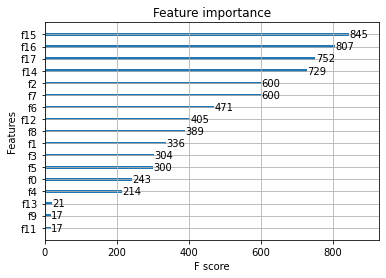

In [11]:
import xgboost as xgb
from xgboost import plot_importance

dtrain = xgb.DMatrix(X, label=Y_ori)

# specify parameters via map
#param = {'max_depth':config[0], 'eta':config[1], 'silent':1, 'objective':'multi:softmax', 'num_class':2 }#, 'nthread': 4} el nthread no hace lo esperado de dividir por nucleos
param = {'max_depth':5, 
            'eta':0.001, 'silent':1, 
            'objective':'multi:softmax', 
            'num_class':3}
            #'scale_pos_weight':sizeClass0/sizeClass1 }#, 'nthread': 4} el nthread no hace lo esperado de dividir por nucleos
num_round = 150

clf_xgboost = xgb.train(param, dtrain, num_round)


print("Prediction accuracy using XGBoost: %f " % accuracy_score(Y_ori,clf_xgboost.predict(dtrain)) )


print(" Clasif. report using all vars ")
print(classification_report(Y_ori,clf_xgboost.predict(dtrain)) )

plot_importance(clf_xgboost)
